In [1]:
from google.colab import drive
drive.mount("/F")

Mounted at /F


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [3]:
!ls '/F/My Drive/Maratona/'

 Autoencoders		      risco.csv
'Rede Recorrentes'	     'Sistema Classificação de Risco.ipynb'
'Redes Neurais Artificiais'   Sistema_Classificação_Risco.ipynb
'Regressão Linear'	      Untitled0.ipynb


In [4]:
base = pd.read_csv('/F/My Drive/Maratona/risco.csv')

In [5]:
base.head()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto


In [6]:
base.describe()

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
base.Risco.value_counts()

Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

In [8]:
base["Risco"].value_counts()

Risco_Medio    50
Risco_Baixo    50
Risco_Alto     50
Name: Risco, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


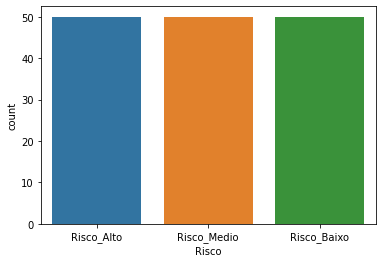

In [9]:
sns.countplot(base["Risco"])

In [10]:
base.isna().sum()

id_cliente         0
anot_cadastrais    0
indice_inad        0
class_renda        0
saldo_contas       0
Risco              0
dtype: int64

In [11]:
base

,id_cliente,anot_cadastrais,indice_inad,class_renda,saldo_contas,Risco
0,0,5.1,3.5,1.4,0.2,Risco_Alto
1,1,4.9,3.0,1.4,0.2,Risco_Alto
2,2,4.7,3.2,1.3,0.2,Risco_Alto
3,3,4.6,3.1,1.5,0.2,Risco_Alto
4,4,5.0,3.6,1.4,0.2,Risco_Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Risco_Baixo
146,146,6.3,2.5,5.0,1.9,Risco_Baixo
147,147,6.5,3.0,5.2,2.0,Risco_Baixo
148,148,6.2,3.4,5.4,2.3,Risco_Baixo


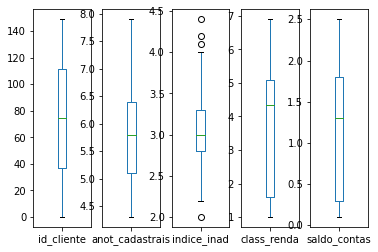

In [12]:
base.plot(kind ='box', subplots = True, sharex=False, sharey = False )
plt.show()

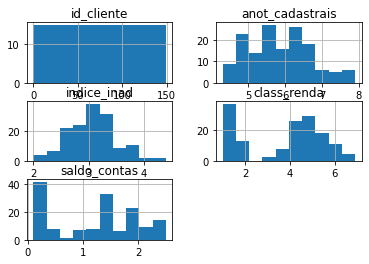

In [13]:
base.hist()
plt.show()

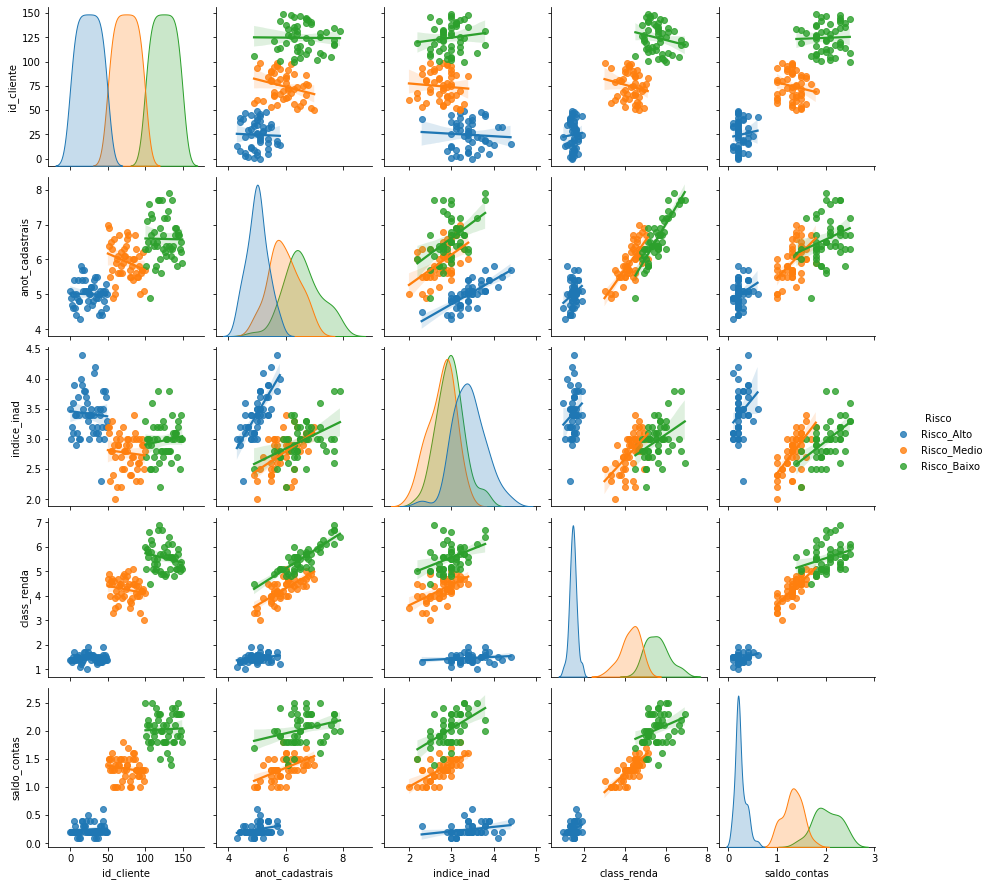

In [14]:
sns.pairplot(base, hue="Risco", kind="reg")

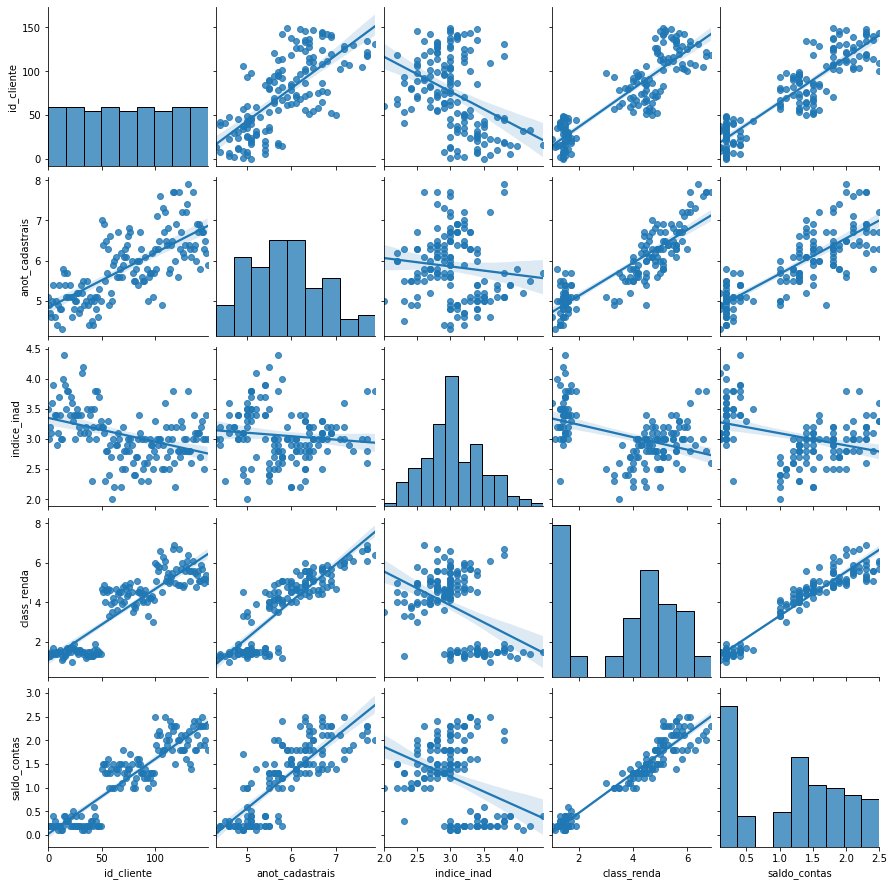

In [15]:
sns.pairplot(base, kind='reg')

In [16]:
base = base.drop(columns="id_cliente")

In [17]:
X=base.iloc[:,:-1].values

In [18]:
y=base.iloc[:,-1].values

In [19]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
y

array(['Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Alto', 'Risco_Alto',
       'Risco_Alto', 'Risco_Alto', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_Medio', 'Risco_Medio',
       'Risco_Medio', 'Risco_Medio', 'Risco_M

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler_x = StandardScaler()

In [24]:
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.fit_transform(X_test)

In [25]:
Maquina_Preditiva = KNeighborsClassifier(n_neighbors=30)

In [26]:
Maquina_Preditiva = Maquina_Preditiva.fit(X_train,Y_train)

In [27]:
y_pred = Maquina_Preditiva.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score


In [29]:
taxa_acerto = accuracy_score(Y_test,y_pred)

In [30]:
taxa_acerto

0.7666666666666667

In [31]:
Maquina_Preditiva.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')>

In [32]:
print("Acurácia da Máquina = ", accuracy_score(Y_test, y_pred)*100)

Acurácia da Máquina =  76.66666666666667


In [33]:
print("\nReal vs Predito \n------------------------------\n")
error_df = pd.DataFrame({"Real" : Y_test,
                         "Predito" : y_pred})

error_df.head(5)


Real vs Predito 
------------------------------



,Real,Predito
0,Risco_Baixo,Risco_Medio
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
print("Acurácia da Máquina = ", accuracy_score(Y_test, y_pred)*100)
cm = confusion_matrix(Y_test,y_pred)
cr = classification_report(Y_test, y_pred)
print(cm)
print(cr)

Acurácia da Máquina =  76.66666666666667
[[ 7  0  0]
 [ 0  6  5]
 [ 0  2 10]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       0.75      0.55      0.63        11
 Risco_Medio       0.67      0.83      0.74        12

    accuracy                           0.77        30
   macro avg       0.81      0.79      0.79        30
weighted avg       0.78      0.77      0.76        30



In [36]:
from sklearn.svm import SVC

In [37]:
classifier = SVC(kernel='linear',             # ['linear', 'rbf']
                 gamma= 1e-5  ,               # [1e-1, 1e-2, 1e-3, 1e-5]
                 C=10,                        # [10.0, 100.0, 1000.0, 10000.0]
                 random_state=7)

In [38]:
classifier.fit(X_train,Y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
taxa_acerto = accuracy_score(Y_test,y_pred)
taxa_acerto

0.9

In [41]:
classifier

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
from sklearn import metrics
print("Prediction Accuracy = ", accuracy_score(Y_test, y_pred))

# Comparando valores Reais com Preditos pela Máquina
print("\nActual vs Predicted  \n------------------------------\n")
error_df = pd.DataFrame({"Actual" : Y_test,
                         "Predicted" : y_pred})

error_df.head(5)

Prediction Accuracy =  0.9

Actual vs Predicted  
------------------------------



,Actual,Predicted
0,Risco_Baixo,Risco_Baixo
1,Risco_Medio,Risco_Medio
2,Risco_Alto,Risco_Alto
3,Risco_Medio,Risco_Medio
4,Risco_Baixo,Risco_Medio


In [43]:
cm = confusion_matrix(Y_test,y_pred)
cr = classification_report(Y_test, y_pred)

In [44]:
print(cm)
print(cr)

[[ 7  0  0]
 [ 0  8  3]
 [ 0  0 12]]
              precision    recall  f1-score   support

  Risco_Alto       1.00      1.00      1.00         7
 Risco_Baixo       1.00      0.73      0.84        11
 Risco_Medio       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30

